# Machine Learning: Predict whether a customer will leave or not

We will create machine learning to predict whether a Beta Bank customer will soon leave the bank or not. Some of the steps taken are checking general information such as whether there are empty or duplicate values ​​and data types, secondly carrying out exploratory data such as checking the relationship between ages of people who leave and so on, thirdly data reprocessing, namely filling in missing values ​​if there are missing values, fourth is creating model and choose the most suitable model.

# Table of Content:

1. General Info
2. Eksploratory Data Analysis (EDA)
3. Data Reprocessing
4. Model
5. Conclusion

## General Info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data.duplicated().sum()

0

***Conclusion: Based on the general information above there is no problem, there is only an empty value in the 'Tenure' column.***

## EDA (Eksploratory Data Analysis)

**Check the age relationship with those who exit**

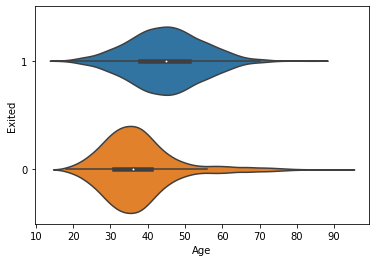

In [6]:
data_copy = data.copy()
data_copy['Exited'] = data_copy['Exited'].astype(str)
sns.violinplot(data=data_copy, y='Exited', x='Age')
plt.show()

In [7]:
data_copy.loc[data_copy['Exited']=='1'].count()

RowNumber          2037
CustomerId         2037
Surname            2037
CreditScore        2037
Geography          2037
Gender             2037
Age                2037
Tenure             1854
Balance            2037
NumOfProducts      2037
HasCrCard          2037
IsActiveMember     2037
EstimatedSalary    2037
Exited             2037
dtype: int64

In [8]:
data_copy.loc[data_copy['Exited']=='0'].count()

RowNumber          7963
CustomerId         7963
Surname            7963
CreditScore        7963
Geography          7963
Gender             7963
Age                7963
Tenure             7237
Balance            7963
NumOfProducts      7963
HasCrCard          7963
IsActiveMember     7963
EstimatedSalary    7963
Exited             7963
dtype: int64

In [9]:
data_copy.groupby('Exited').agg({'Age':['mean','median']}).reset_index()

Exited        Age       
               mean median
0      0  37.408389     36
1      1  44.837997     45

From the table above, it can be seen that the average age of people who leave is 45 years and the median is also 45 years.

**Check the relationship between the savings amount and the Exit**

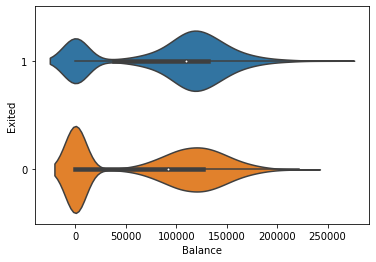

In [10]:
sns.violinplot(data=data_copy, y='Exited', x='Balance')
plt.show()

In [11]:
data_copy.groupby('Exited').agg({'Balance':['mean','median']}).reset_index()

Exited       Balance           
                  mean     median
0      0  72745.296779   92072.68
1      1  91108.539337  109349.29

The table above shows that people who exit have an average savings of 91108.5 dollars and the median is 109349.3 dollars.

**Check the credit score relationship with the Exit**

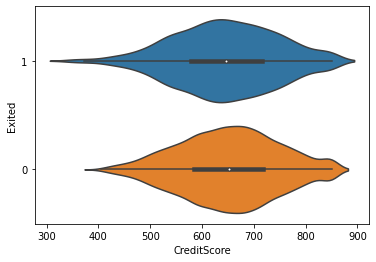

In [12]:
sns.violinplot(data=data_copy, y='Exited', x='CreditScore')
plt.show()

In [13]:
data_copy.groupby('Exited').agg({'CreditScore':['mean','median']}).reset_index()

Exited CreditScore       
                mean median
0      0  651.853196    653
1      1  645.351497    646

The table above shows that the average credit score of people who exit is around 645 and the median is 646.

**Check the relationship between salary amount and Exit**

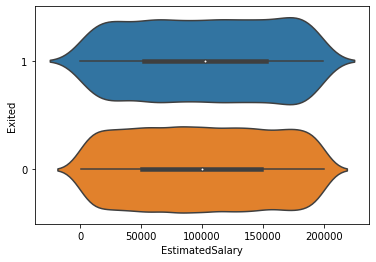

In [14]:
sns.violinplot(data=data_copy, y='Exited', x='EstimatedSalary')
plt.show()

In [15]:
data_copy.groupby('Exited').agg({'EstimatedSalary':['mean','median']}).reset_index()

Exited EstimatedSalary           
                    mean     median
0      0    99738.391772   99645.04
1      1   101465.677531  102460.84


The table above shows that people who leave and don't leave have an average salary that is not too different.

**Check Exit Amount by country**

In [16]:
pd.pivot_table(data=data_copy, index='Geography', columns='Exited', values='CustomerId', aggfunc='count')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


The table above shows that most people who left were from Germany.

**Check the number of customers who have exited**

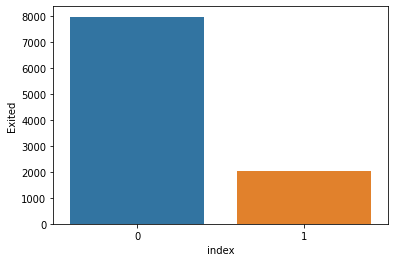

In [17]:
data_exited = data['Exited'].value_counts().reset_index()
sns.barplot(data=data_exited, x='index', y='Exited')
plt.show()

The diagram above shows that the number of people who did not leave is still greater than the number of people who left.

## Data Reprocessing

In [18]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [19]:
#Fill missing values with 0
data['Tenure'] = data['Tenure'].fillna(0)
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
#Drop columns that don't really matter
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [21]:
data = pd.get_dummies(data=data, drop_first=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


## Model

**Function for evaluation**

Here we create a general function so that later its use will be easier when we use various models and more efficient because there is no need to create the function again.

In [22]:
def class_eval(model, X_train, X_test, y_train, y_test):
    #Prediksi Train
    y_train_predict = model.predict(X_train)
    
    #Prediksi Test
    y_test_predict = model.predict(X_test)
    
    #Confusion matrix
    cm_train = confusion_matrix(y_train, y_train_predict)
    cm_test = confusion_matrix(y_test, y_test_predict)
    
    #Accuracy
    accuracy_train = (cm_train[0][0] + cm_train[1][1]) / (cm_train[0][0] + cm_train[1][1] + cm_train[0][1] + cm_train[1][0])
    accuracy_test = (cm_test[0][0] + cm_test[1][1]) / (cm_test[0][0] + cm_test[1][1] + cm_test[0][1] + cm_test[1][0])
    
    #Precise
    precise_train_1 = cm_train[1][1]/(cm_train[1][1]+cm_train[0][1])
    precise_train_0 = cm_train[0][0]/(cm_train[0][0]+cm_train[1][0])
    precise_test_1 = cm_test[1][1]/(cm_test[1][1]+cm_test[0][1])
    precise_test_0 = cm_test[0][0]/(cm_test[0][0]+cm_test[1][0])
    
    #Recall
    recall_train_1 = cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])
    recall_train_0 = cm_train[0][0]/(cm_train[0][0]+cm_train[0][1])
    recall_test_1 = cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])
    recall_test_0 = cm_test[0][0]/(cm_test[0][0]+cm_test[0][1])
    
    #F1 Score
    f1_score_train_1 = (2 * precise_train_1 * recall_train_1) / (precise_train_1 + recall_train_1)
    f1_score_train_0 = (2 * precise_train_0 * recall_train_0) / (precise_train_0 + recall_train_0)
    f1_score_test_1 = (2 * precise_test_1 * recall_test_1) / (precise_test_1 + recall_test_1)
    f1_score_test_0 = (2 * precise_test_0 * recall_test_0) / (precise_test_0 + recall_test_0)
    
    #ROC-AUC
    roc_auc_train = roc_auc_score(y_train, y_train_predict)
    roc_auc_test = roc_auc_score(y_test, y_test_predict)
    
    print('Confusion Matrix Training')
    print(cm_train)
    print('Confusion Matrix Test')
    print(cm_test)
    print('---------------------------')
    print('Accuracy_train:', round(accuracy_train*100,1), '%')
    print('Accuracy_test:', round(accuracy_test*100,1), '%')
    print('---------------------------')
    print('Precise_train_1:', round(precise_train_1*100,1), '%')
    print('Precise_train_0:', round(precise_train_0*100,1), '%')
    print('precise_test_1:', round(precise_test_1*100,1), '%')
    print('precise_test_0:', round(precise_test_0*100,1), '%')
    print('---------------------------')
    print('recall_train_1:', round(recall_train_1*100,1), '%')
    print('recall_train_0:', round(recall_train_0*100,1), '%')
    print('recall_test_1:', round(recall_test_1*100,1), '%')
    print('recall_test_0:', round(recall_test_0*100,1), '%')
    print('---------------------------')
    print('f1_score_train_1:', round(f1_score_train_1*100,1), '%')
    print('f1_score_train_0:', round(f1_score_train_0*100,1), '%')
    print('f1_score_test_1:', round(f1_score_test_1*100,1), '%')
    print('f1_score_test_0:', round(f1_score_test_0*100,1), '%')
    print('---------------------------')
    print('ROC-AUC-Train:', round(roc_auc_train*100,1), '%')
    print('ROC-AUC-Test:', round(roc_auc_test*100,1), '%')

**Logistic Regression**

In [23]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
class_eval(model=lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Confusion Matrix Training
[[6259  140]
 [1517   84]]
Confusion Matrix Test
[[1540   24]
 [ 415   21]]
---------------------------
Accuracy_train: 79.3 %
Accuracy_test: 78.0 %
---------------------------
Precise_train_1: 37.5 %
Precise_train_0: 80.5 %
precise_test_1: 46.7 %
precise_test_0: 78.8 %
---------------------------
recall_train_1: 5.2 %
recall_train_0: 97.8 %
recall_test_1: 4.8 %
recall_test_0: 98.5 %
---------------------------
f1_score_train_1: 9.2 %
f1_score_train_0: 88.3 %
f1_score_test_1: 8.7 %
f1_score_test_0: 87.5 %
---------------------------
ROC-AUC-Train: 51.5 %
ROC-AUC-Test: 51.6 %


**Random Forest**

In [26]:
rf = RandomForestClassifier(max_depth=9)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9)

In [27]:
class_eval(model=rf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Confusion Matrix Training
[[6318   81]
 [ 812  789]]
Confusion Matrix Test
[[1530   34]
 [ 238  198]]
---------------------------
Accuracy_train: 88.8 %
Accuracy_test: 86.4 %
---------------------------
Precise_train_1: 90.7 %
Precise_train_0: 88.6 %
precise_test_1: 85.3 %
precise_test_0: 86.5 %
---------------------------
recall_train_1: 49.3 %
recall_train_0: 98.7 %
recall_test_1: 45.4 %
recall_test_0: 97.8 %
---------------------------
f1_score_train_1: 63.9 %
f1_score_train_0: 93.4 %
f1_score_test_1: 59.3 %
f1_score_test_0: 91.8 %
---------------------------
ROC-AUC-Train: 74.0 %
ROC-AUC-Test: 71.6 %


**XGBoost**

In [28]:
xg = XGBClassifier(max_depth=4)
xg.fit(X_train, y_train)

[04:13:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
class_eval(model=xg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Confusion Matrix Training
[[6269  130]
 [ 616  985]]
Confusion Matrix Test
[[1501   63]
 [ 212  224]]
---------------------------
Accuracy_train: 90.7 %
Accuracy_test: 86.2 %
---------------------------
Precise_train_1: 88.3 %
Precise_train_0: 91.1 %
precise_test_1: 78.0 %
precise_test_0: 87.6 %
---------------------------
recall_train_1: 61.5 %
recall_train_0: 98.0 %
recall_test_1: 51.4 %
recall_test_0: 96.0 %
---------------------------
f1_score_train_1: 72.5 %
f1_score_train_0: 94.4 %
f1_score_test_1: 62.0 %
f1_score_test_0: 91.6 %
---------------------------
ROC-AUC-Train: 79.7 %
ROC-AUC-Test: 73.7 %


***Conclusion: By comparing the Logistic Regression, Random Forest, and XGBoost models, it is found that the F1 Score value that meets the requirements (minimum 0.59) is the Random Forest and XGBoost models. Then we compare the training and test accuracy values, training and test precision, training and test recall, training and test ROC-AUC, we find that the XGBoost model has the best value compared to the other models.***

## Conclusion

We created machine learning to predict whether a Beta Bank customer will soon leave the bank or not. The first step taken was to check general information, it was found that there was an empty value in the 'Tenure' column.
The data types are appropriate and there are no duplicate data. The second was to carry out exploratory data, it was found that the average age of those who left was 44 years, but the number of people who left was not as many as people who stayed. Third is data reprocessing, namely filling in missing values ​​for the 'Tenure' column with 0, fourth is model creation and selecting the most appropriate model. By comparing the Logistic Regression, Random Forest, and XGBoost models, it was found that the F1 Score value that meets the requirements (minimum 0.59) is the Random Forest and XGBoost models. Then we compare the training and test accuracy values, training and test precision, training and test recall, training and test ROC-AUC, we find that the XGBoost model has the best value compared to the other models.